In [1]:
import os
import sys
sys.path.append('../')
sys.path.append('../datasets')
sys.path.append('../models')
import torch
import torchvision
import torch.backends.cudnn as cudnn
import random
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from importlib import reload
from datasets.three_dim_shapes import ThreeDimShapesDataset
from datasets.small_norb import SmallNORBDataset
from datasets.seq_mnist import SequentialMNIST
from datasets.seq_mnist import SequentialMNIST_double
from datasets import seq_mnist as sm

import models.seqae as seqae
import models.base_networks as bn 
import models
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge
from einops import rearrange
from sklearn.metrics import r2_score
import pdb
from einops import rearrange
from utils import notebook_utils as nb
from utils import evaluations as ev



import copy

import csv
import ast
from source import yaml_utils as yu


from tqdm import tqdm

if torch.cuda.is_available():
    device = torch.device('cuda')
    cudnn.deterministic = True
    cudnn.benchmark = True
else:
    device = torch.device('cpu')
    gpu_index = -1

    
from utils import yaml_utils as yu
import yaml
rootpath = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/'
result_dir = '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result'
jobdir = '/mnt/vol21/masomatics/ULASclone/jobs'

mode = 'so3'
dat_root = f"""/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/{mode}"""

playground_path = os.path.join(result_dir, '20220913_playground_model')


print(os.path.exists(playground_path))

print(nb.filter_list('double', os.listdir(result_dir)))
#1116
#targpath = os.path.join(result_dir, '20221116_mnist_double_0')

#1117
targpath = os.path.join(result_dir, '20221122_double_translation_0')
#targpath = os.path.join(result_dir, '20221117_mnist_double_two_0')



print(os.path.exists(targpath))
print(os.listdir(targpath))

True
['20221031_double_mnist_two_0', '20221117_mnist_double_0', '20221117_mnist_double_two_0', '20221104_mnist_double_0', '20221103_mnist_double_0', '20221122_double_translation_0', '20221124_double_translate_0', '20221116_mnist_double_0', '20221101_mnist_double_0', '20221031_double_mnist_0', '20221101_mnist_double_two_0']
True
['dim_m128_dim_a16', 'dim_m128_dim_a8', 'dim_m64_dim_a8', 'dim_m64_dim_a16', 'dim_m256_dim_a8', 'dim_m256_dim_a16']


In [2]:
reload(nb)
alltarglist = os.listdir(targpath)

alltarglist = nb.model_exists(alltarglist,  targpath)

#1116, 1117
targlist = nb.filter_queries(query_list=['dim_m256'] , mylist=alltarglist)

#1117
#targlist = nb.filter_queries(query_list=['pair_transitionTrue'] , mylist=alltarglist)

print(targlist)







['dim_m256_dim_a8', 'dim_m256_dim_a16']


In [3]:
reload(ev)
reload(sm)
results = {} 
inferred_Ms = {} 
model_configs = {}
models = {}
tp = 7
n_cond = 2
device =0
predictive = False
reconstructive = False
repeats=3


targdir_pathlist = [os.path.join(targpath, targdir) for targdir in targlist] 

#targdir_pathlist = ['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221116_mnist_double_0/pair_transitionFalse_dim_m256_dim_a8']
#targdir_pathlist = []
#targdir_pathlist.append(playground_path)

print(targdir_pathlist)

reload(ev)
reload(bn)
allresults, targ, xnext = ev.prediction_evaluation(targdir_pathlist, device=0,
                                                                        n_cond=2,
                                                                        tp=tp,
                                                                    repeats=1,
                           predictive= False , reconstructive = False)

results = allresults['results']





['/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a8', '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a16']


/usr/local/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


{'args': {'T': 9, 'backgrnd': False, 'fixpos': False, 'max_T': 9, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': True, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'same_object': True, 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}


/usr/local/lib/python3.8/site-packages/torch/nn/modules/lazy.py:178: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a8 
 snapshot_model_iter_50000


100%|██████████| 183/183 [00:15<00:00, 12.02it/s]


tensor([ 0.3785,  3.9672, 10.1680, 15.2577, 18.8272, 21.6676, 23.9943])
{'args': {'T': 9, 'backgrnd': False, 'fixpos': False, 'max_T': 9, 'max_angle_velocity_ratio': [-0.5, 0.5], 'max_color_velocity_ratio': [-0.5, 0.5], 'only_use_digit4': True, 'pair_transition': True, 'root': '/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/datasets/MNIST', 'same_object': True, 'train': True}, 'fn': './datasets/seq_mnist.py', 'name': 'SequentialMNIST_double'}
/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a16 
 snapshot_model_iter_50000


100%|██████████| 183/183 [00:16<00:00, 11.14it/s]

tensor([ 0.3804,  3.6238,  9.4043, 14.4197, 18.0041, 20.9290, 22.8993])


In [4]:
mode = list(results.keys())[1]
print(mode)
print(len(targ))

/mnt/nfs-mnj-hot-01/tmp/masomatics/block_diag/result/20221122_double_translation_0/dim_m256_dim_a16
18


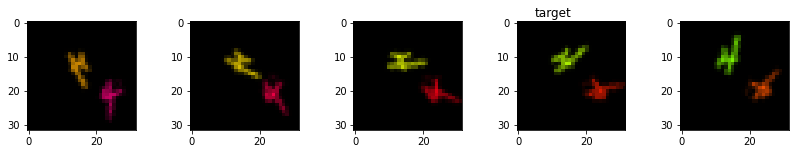

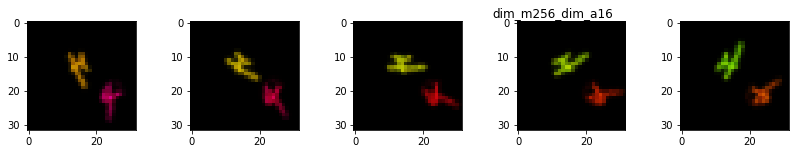

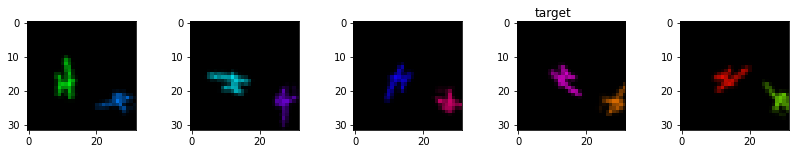

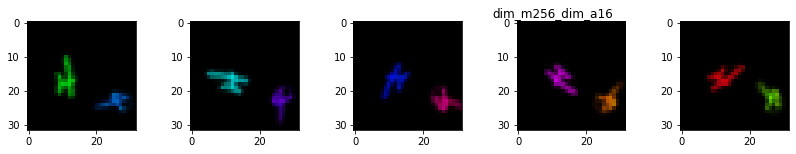

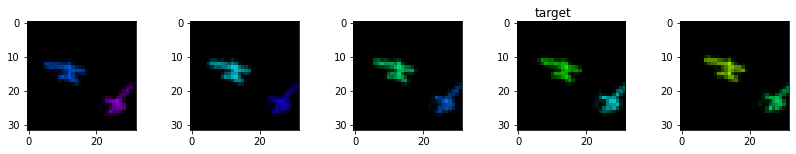

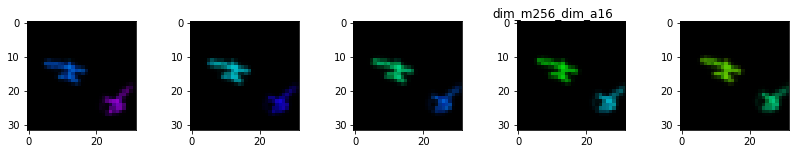

In [5]:
device = 0
shift = 15
reload(sm)
for idx in list(range(0+shift, 3+shift)):
    figsize = (20,2)


    plt.figure(figsize = figsize)
    for k in range(tp-n_cond):
        tn = torch.permute(targ[idx][k+n_cond], (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(tn, interpolation=None)
    plt.suptitle("target")  

#     for mode in list(allresults['models'].keys()):
    plt.figure(figsize = figsize)
    xnext, M = ev.predict(targ, allresults['models'][mode].to(device),
                n_cond=2, tp=tp, device=device, swap =False,
                predictive=False, reconstructive=False)
    xnext = xnext.to('cpu')
    M = M.to('cpu')
    for k in range(tp-n_cond):
        xn = torch.permute(xnext[idx][k], (1,2,0))
        plt.subplot(1, tp, k+1)
        plt.imshow(xn, interpolation=None)
    plt.suptitle(mode.split('/')[-1])    



# THERE SEEMS TO BE NO TRANSLTATION HERE, what's happening?

In [6]:
from utils import optimize_bd_cob as obc 
reload(obc)
Ms = allresults['Ms'][mode]
normalize=False
ChangeB= obc.optimize_bd_cob(Ms,  lr=0.1, epochs_monitor=20, n_epochs=300, normalize=True) 

ep:19 loss:9.71266653536934
ep:39 loss:9.706464052771674
ep:59 loss:9.70436422778335
ep:79 loss:9.702526652131413
ep:99 loss:9.701148300863055
ep:119 loss:9.700300495822884
ep:139 loss:9.699498806698442
ep:159 loss:9.698558160271885
ep:179 loss:9.698696680731743
ep:199 loss:9.698323441792416
ep:219 loss:9.698340068570314
ep:239 loss:9.6972372550664
ep:259 loss:9.697161545536364
ep:279 loss:9.696956957419088
ep:299 loss:9.69706003749995


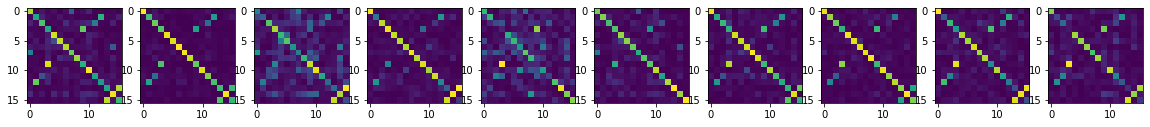

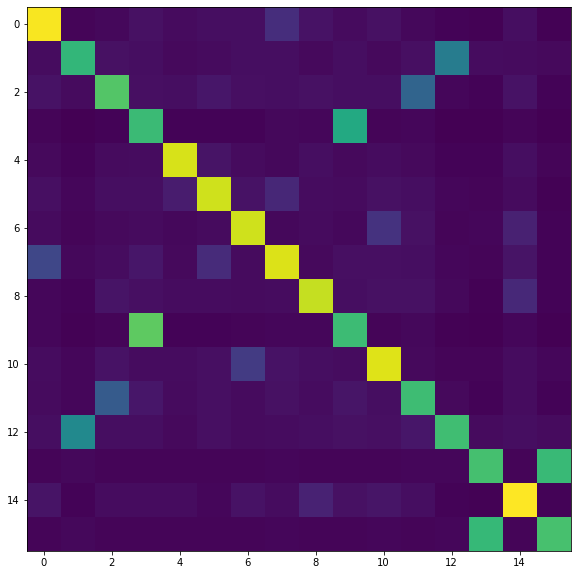

In [7]:
PMPs = ChangeB(Ms)
plt.figure(figsize=(20, 20))
for k in range(10):
    plt.subplot(1, 10, k+1)
    plt.imshow(torch.abs(PMPs[k]).detach().to('cpu'))
    
plt.figure(figsize=(10, 10))
plt.imshow(torch.mean(torch.abs(PMPs.detach()), axis=0))





In [8]:
reload(obc)
selections = obc.obtain_blocks(torch.mean(torch.abs(PMPs.detach()), axis=0), threshconst=0.2)
print(selections)

15 1 1
13 2 3
11 2 5
9 2 7
8 1 8
7 1 9
5 2 11
4 2 12
3 1 13
1 2 15
0 1 16
[[1, 12], [2, 11], [3, 9], [4], [5], [6, 10], [0, 7], [8], [13, 15], [14]]


# Obtain pair of sequences moving only one obj

/tmp/ipykernel_5457/854296194.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0]))
/tmp/ipykernel_5457/854296194.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0]))


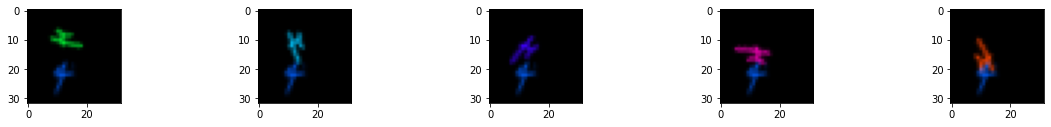

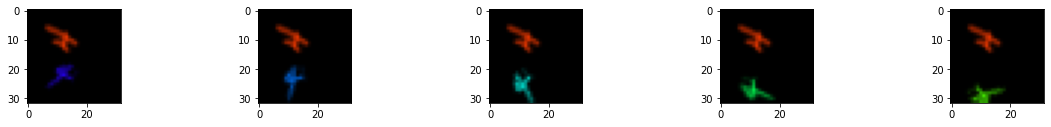

In [10]:
from utils import optimize_lasso as ol 
import einops
reload(ol)
datseqs1, datseqs2 = ol.obtain_pair_sequences(mode, size=30, T=5)



idd = 2
datseq1= datseqs1[idd]
datseq2= datseqs2[idd]


plt.figure(figsize=(20,10))
for k in range(len(datseq1)):
    plt.subplot(5, len(datseq1),  k+1)
    plt.imshow(torch.tensor(datseq1[k]).permute([1, 2, 0])) 

plt.figure(figsize=(20,10))
for k in range(len(datseq2)):
    plt.subplot(5, len(datseq2),  k+1)
    plt.imshow(torch.tensor(datseq2[k]).permute([1, 2, 0])) 

# Encode the sequences by Model 

In [21]:
checkmodel = allresults['models'][mode].to('cpu')


encoded = checkmodel.encode(datseqs1).detach()
encoded_two = checkmodel.encode(datseqs2).detach()
print(datseqs1.shape)
print(datseqs2.shape)

print(encoded.shape)
print(encoded_two.shape)

encodedP = (encoded.to('cpu') @ ChangeB.U).detach()

encoded_twoP = (encoded_two.to('cpu') @ ChangeB.U).detach()

torch.Size([30, 5, 3, 32, 32])
torch.Size([30, 5, 3, 32, 32])
torch.Size([30, 5, 256, 16])
torch.Size([30, 5, 256, 16])


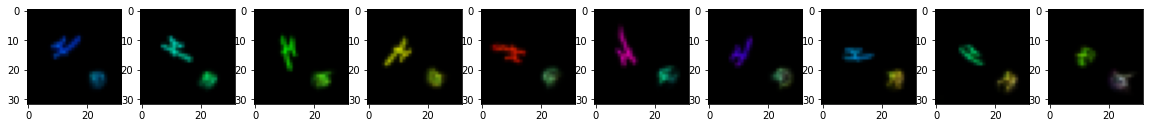

In [32]:
# Check if these encoded latents moves appropriately

dat_idx = 0
H = encoded[dat_idx][0]
HP = encodedP[dat_idx][0]
T0 = 10

Hs_moved = ol.repeat_apply(H, Ms[0], T=T0).unsqueeze(0)
dec_Hs_moved = torch.sigmoid(checkmodel.decode(Hs_moved)).detach().squeeze(0)


plt.figure(figsize=(20,10))
for t in range(T0):
    plt.subplot(1, T0, t+1)
    plt.imshow(dec_Hs_moved[t].permute([1,2,0]))

In [33]:
dataconfig = allresults['configs'][mode]['train_data']['args']

data_result = sm.SequentialMNIST_double(align_initial=True, **dataconfig)

In [53]:
dat_idx=10
seq0 = torch.stack([torch.tensor(data_result[dat_idx][k]) for k in range(len(data_result[dat_idx]))])
encoded0 = checkmodel.encode(seq0.unsqueeze(0)).detach()



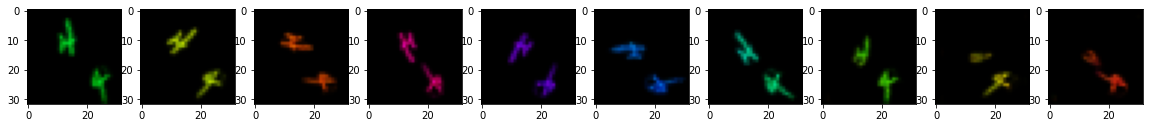

In [55]:



H0 = encoded0[0][0]

H0s_moved = ol.repeat_apply(H0, Ms[0], T=T0).unsqueeze(0)
dec_H0s_moved = torch.sigmoid(checkmodel.decode(H0s_moved)).detach().squeeze(0)

plt.figure(figsize=(20,10))
for t in range(T0):
    plt.subplot(1, T0, t+1)
    plt.imshow(dec_H0s_moved[t].permute([1,2,0]))